Assignment 2 – Basic Statistics in Python

Age groups: 1 (<30 years), 2 (30-50 years), 3 (>50 years).

Gender: M=Male, F=Female,

BMI=Body mass index,

DBP=Diastolic blood pressure,

B/L=Baseline, min=Minute

a. Represent the above data in a Pandas data frame with 20 observations and 6 attributes

b. Identify the data in terms of categorical, numeric etc.

c. Write descriptive statistics for the numeric data

d. Analyse and represent the categorical variables in terms of percentage through a pie chart

e. Analyse if there are outliers for any of the attributes


In [15]:
import pandas as pd

#a
patientdata = pd.DataFrame({
    'Gender':         pd.Categorical(['M','M','M','M','M','M','M','M','M','M','F','F','F','F','F','F','F','F','F','F'], categories=['M,F'], ordered=False),
    'Age groups':      pd.Categorical([1,2,3,1,1,3,3,2,1,3,3,2,2,2,3,1,1,3,3,2], categories=[1,2,3], ordered=True),
    'BMI':            [23,25,26,24,23,27,27,24,21,28,26,26,23,24,25,22,19,25,26,25],
    'DBP (B/L)':      [68,80,85,75,77,82,80,82,80,74,75,86,85,87,83,79,73,77,82,81],
    'DBP (at 60 min)':[70,78,85,75,72,72,75,85,80,75,85,80,82,82,85,74,87,86,85,72],
    'DBP (at 30 min)':[75,79,90,80,81,89,92,90,80,80,89,88,87,91,88,78,74,84,83,80],
})


#b 
Gender and Age groups are categorical data

In [16]:
#c descriptive statistics for the numeric data
patientdata.describe()

,BMI,DBP (B/L),DBP (at 60 min),DBP (at 30 min)
count,20.000000,20.000000,20.00000,20.000000
mean,24.450000,79.550000,79.25000,83.900000
std,2.187885,4.871777,5.68354,5.580983
min,19.000000,68.000000,70.00000,74.000000
25%,23.000000,76.500000,74.75000,80.000000
50%,25.000000,80.000000,80.00000,83.500000
75%,26.000000,82.250000,85.00000,89.000000
max,28.000000,87.000000,87.00000,92.000000


C:\Users\nismai01\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

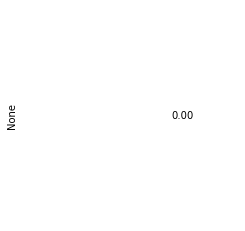

In [17]:
#d
import matplotlib.pyplot as plt
patientdata.groupby('Gender').size().plot(kind='pie',labels=['Gender'], autopct='%.2f')

<AxesSubplot:ylabel='None'>

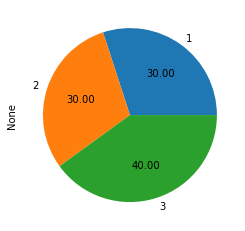

In [13]:
patientdata.groupby('Age groups').size().plot(kind='pie', autopct='%.2f')

[0.67995731 0.25791484 0.72685092 0.21102123 0.67995731 1.195787
 1.195787   0.21102123 1.61782947 1.66472307 0.72685092 0.72685092
 0.67995731 0.21102123 0.25791484 1.14889339 2.55570162 0.25791484
 0.72685092 0.25791484]
[2.43238763 0.09476835 1.14775001 0.95821331 0.53702065 0.51596101
 0.09476835 0.51596101 0.09476835 1.16880964 0.95821331 1.35834634
 1.14775001 1.56894267 0.72655734 0.11582798 1.37940597 0.53702065
 0.51596101 0.30536468]
[1.66978662 0.22564684 1.03797547 0.76719926 1.30875168 1.30875168
 0.76719926 1.03797547 0.1353881  0.76719926 1.03797547 0.1353881
 0.49642305 0.49642305 1.03797547 0.94771673 1.39901042 1.21849294
 1.03797547 1.30875168]
[1.63612893 0.90079009 1.12139174 0.71695537 0.53312066 0.93755703
 1.48906116 1.12139174 0.71695537 0.71695537 0.93755703 0.75372232
 0.56988761 1.30522645 0.75372232 1.0846248  1.81996364 0.01838347
 0.16545124 0.71695537]


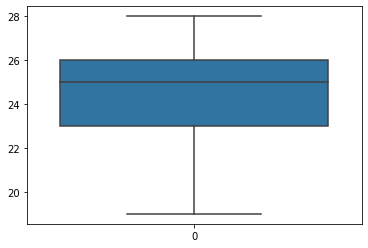

In [31]:
#e Box plot can be used to detect outliers

import seaborn as sns
from scipy import stats
import numpy as np

sns.boxplot(data=patientdata['BMI'])

z_bmi = np.abs(stats.zscore(patientdata['BMI']))

z_dbpbl = np.abs(stats.zscore(patientdata['DBP (B/L)']))

z_dbp60 = np.abs(stats.zscore(patientdata['DBP (at 60 min)']))

z_dbp30 = np.abs(stats.zscore(patientdata['DBP (at 30 min)']))

print(z_bmi)
print(z_dbpbl)
print(z_dbp60)
print(z_dbp30)

#estimatting threshold value to be 3.0

# There are no outlier in the dataset

In [ ]:
2. Using ANOVA, identify if there is any significant difference between the mean strength of the three groups.
We compare the p value with the level of significance (α, generally
taken as 0.05*)
If (p value < α)
reject the null hypothesis
If (p value > α)
fail to reject the null hypothesis (or we do not have enough
evidence to reject the null hypothesis)

In [3]:
from scipy.stats import f_oneway

Resin_a = [19.7, 20.1,21.3,23.5,9.3,27.1,11.6,12.2,15.9,17.0,17.2,18.4,19.4,23.4,2.0]
Resin_b = [23.0, 24.5,24.6,27.1,12.0,27.8,12.8,16.2,19.8,22.4,23.6,25.3,27.9,4.6,35.2]
Resin_c = [21.6,25.5,25.9,30.7,3.0,16.5,22.7,24.2,26.2,28.4,28.5,30.7,32.2,33.8,34.5]

print(f_oneway(Resin_a,Resin_b,Resin_c))

F_onewayResult(statistic=4.941230994131398, pvalue=0.011825050132581737)


H0: There is significant difference between mean strength of the mean strength of the resign groups
We assume the level of significance to be 0.05
Here p value is 0.01<0.05, this states that there is only 10% chnage for the H0 to be true hence we reject the hypothesis.
statistic value denotes F-statistics 